In [77]:
import numpy as np
import matplotlib.pyplot as plt

def extract_top_signals(signal, fs, num_signals=3):
    # Generate a more complex sample signal
    fs  # Sampling frequency
    # t = np.arange(0, len(signal))  # Time vector
    t = np.arange(0, 1, 1/fs)  # Time vector

    # Perform FFT
    fft_result = np.fft.fft(signal)
    freq = np.fft.fftfreq(len(signal), 1/fs)

    # Filter out negative frequencies
    positive_freq_indices = np.where(freq > 0)
    fft_result = fft_result[positive_freq_indices]
    freq = freq[positive_freq_indices]

    # Get the top 3 frequencies
    top_indices = np.argsort(np.abs(fft_result))[::-1][:3]

    # Print amplitude, phase, and frequency of the top 3 frequencies
    amplitude = np.zeros(3)
    frequency = np.zeros(3)
    phase = np.zeros(3)

    for i, i_fft in enumerate(top_indices):
        amplitude[i] = np.abs(fft_result[i_fft])*2/fs
        phase[i] = np.angle(fft_result[i_fft])
        frequency[i] = np.abs(freq[i_fft])
        print(f"Frequency {i} - Amplitude: {amplitude[i]}, Phase: {phase[i]}, Frequency: {frequency[i]}")

    # Create a new signal using the top 3 frequencies, amplitudes, and phases
    new_signal = 0
    for i in range(num_signals):
        new_signal += amplitude[i] * np.cos(2 * np.pi * frequency[i] * t + phase[i])
        
    return new_signal, amplitude, frequency, phase


In [78]:
# Generate a more complex sample signal
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector
f1, f2, f3 = 5, 50, 150  # Frequencies of the signal
signal = 2 * np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t) + 0.2 * np.sin(2 * np.pi * f3 * t)

new_signal, amplitude, frequency, phase = extract_top_signals(signal, 1000)

Frequency 0 - Amplitude: 2.0, Phase: -1.570796326794897, Frequency: 5.0
Frequency 1 - Amplitude: 0.4999999999999998, Phase: -1.5707963267948928, Frequency: 50.0
Frequency 2 - Amplitude: 0.19999999999999973, Phase: -1.5707963267949152, Frequency: 150.0


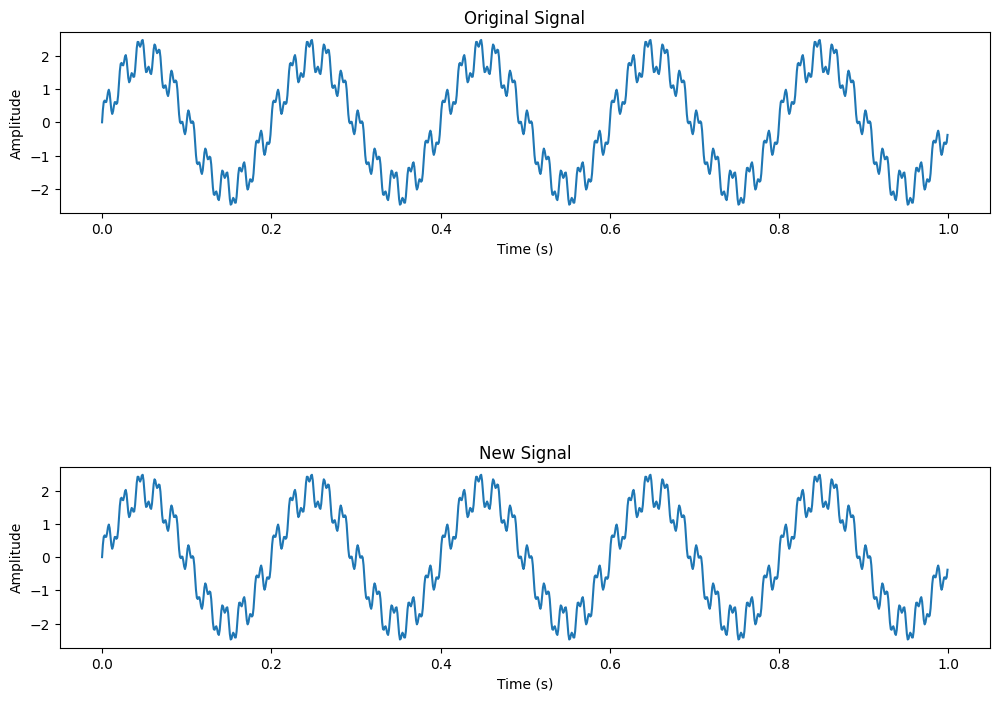

In [79]:

# Plot the original signal, its FFT, and the reconstructed signal
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.subplot(3, 1, 3)
plt.plot(t, new_signal)
plt.title('New Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()
